In [2]:
# import libraries for data preprocessing
import numpy as np                                                              # to work with dataframes and other data
import pandas as pd                                                             # to work with dataframes
from sklearn.feature_extraction.text import CountVectorizer                     # for string vectorization
from sklearn.preprocessing import OneHotEncoder                                 # for categorical vectorization
from sklearn.preprocessing import MinMaxScaler                                  # to normalise numeric data

# to plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# load data
movies = pd.read_csv('./data/filmtv_movies - ENG.csv')

In [3]:
# check data structure
movies

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40298,221040,Louis C.K.: Sorry,2021,Comedy,63,United States,Louis C.K.,Louis C.K.,6.0,NaN,6.0,1,Show recorded at the Madison Square Garden in ...,NaN,0,0,0,0,0
40299,221041,"Me, Natalie",1969,Comedy,111,United States,Fred Coe,"Patty Duke, James Farentino, Martin Balsam, Al...",8.0,NaN,8.0,1,"Brooklyn. Natalie Miller (Patty Duke), a girl ...",NaN,0,0,0,0,0
40300,221059,Il nero,1967,Drama,107,Italy,Giovanni Vento,"Joy Nwosu, Alessandra Dal Sasso, Andrea Checch...",6.0,6.00,NaN,1,"The hopes, the illusions, the daily vicissitud...",NaN,0,0,0,0,0
40301,221061,Operatsiya 'Y' i drugie priklyucheniya Shurika,1965,Comedy,95,Soviet Union,Leonid Gaidai,"Aleksandr Demyanenko, Mikhail Pugovkin, Alekse...",6.0,6.00,NaN,1,"Three episodes starring the excerpt Shurik, a ...",NaN,0,0,0,0,0


In [4]:
# another way to look on data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40303 entries, 0 to 40302
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     40303 non-null  int64  
 1   title         40303 non-null  object 
 2   year          40303 non-null  int64  
 3   genre         40208 non-null  object 
 4   duration      40303 non-null  int64  
 5   country       40292 non-null  object 
 6   directors     40270 non-null  object 
 7   actors        38251 non-null  object 
 8   avg_vote      40303 non-null  float64
 9   critics_vote  35703 non-null  float64
 10  public_vote   39829 non-null  float64
 11  total_votes   40303 non-null  int64  
 12  description   38848 non-null  object 
 13  notes         18456 non-null  object 
 14  humor         40303 non-null  int64  
 15  rhythm        40303 non-null  int64  
 16  effort        40303 non-null  int64  
 17  tension       40303 non-null  int64  
 18  erotism       40303 non-nu

In [5]:
# Choose all columns with relevant features
movie_data = movies[['avg_vote','genre','directors','actors','duration', 'humor', 'rhythm', 'effort', 'tension', 'erotism']]

# delete movies variable as we do not need it anymore
del movies

In [6]:
# Check changes
movie_data.head(5)

,avg_vote,genre,directors,actors,duration,humor,rhythm,effort,tension,erotism
0,7.7,Animation,"David Detiege, Art Davis, Bill Perez",NaN,76,3,3,0,0,0
1,6.5,Drama,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",98,0,2,0,2,0
2,5.6,Romantic,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",91,1,2,1,0,0
3,7.0,Comedy,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",95,2,2,0,1,2
4,5.9,Comedy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",85,3,1,1,0,0


In [7]:
# Check data for null values
movie_data.isnull().sum()

avg_vote        0
genre          95
directors      33
actors       2052
duration        0
humor           0
rhythm          0
effort          0
tension         0
erotism         0
dtype: int64

In [8]:
# As there are not so many null values and we can not simply generate data for actors/directros/genre fields, we can simply drop these rows from the dataset
movie_data = movie_data.dropna()

In [9]:
# Check data for null values again
movie_data.isnull().sum()

avg_vote     0
genre        0
directors    0
actors       0
duration     0
humor        0
rhythm       0
effort       0
tension      0
erotism      0
dtype: int64

In [10]:
# Check data for duplicates
movie_data.duplicated().sum()

6

In [11]:
# Drop all duplicate values except the first one
movie_data.drop_duplicates(keep = 'first', inplace = True)

In [12]:
# Check for duplicates again
movie_data.duplicated().sum()

0

### Treat the outliers in duration column

<AxesSubplot: >

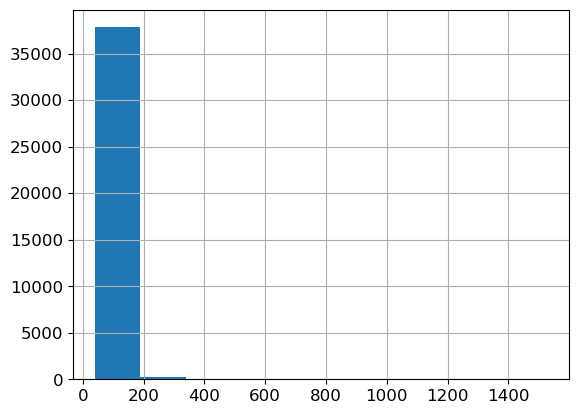

In [13]:
# duration plot, as we can see it is not distributed evenly due to some huge numbers, therefore I decided to cap large numbers at 240 (it is 4 hours)
movie_data['duration'].hist()

<AxesSubplot: >

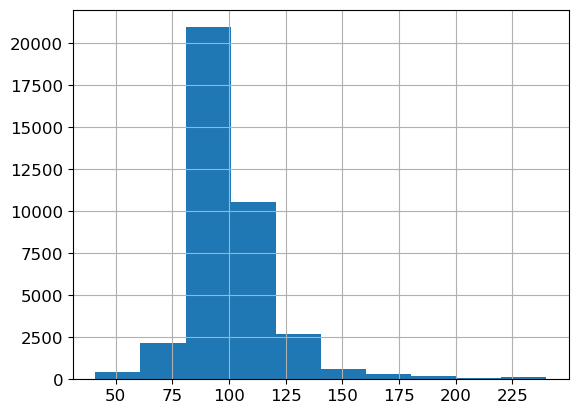

In [14]:
#Function to cap duration large values at 240
def duration_cap(duration):
    if duration > 240.0:
        return 240.0
    else:
        return duration


movie_data['duration'] = movie_data['duration'].apply(duration_cap)

# as we can see now our data is distributed much better
movie_data['duration'].hist()

In [15]:
# Look on actors column structure
movie_data.iloc[0].actors

'Kim Rossi Stuart, Simona Cavallari, Ennio Fantastichini, Orso Maria Guerrini, Silli Togni, Maria Pia Calzone, Luciano Curreli, Francesco Maria Dominedò'

In [16]:
#Function that will take first 3 actors names from actors feature
# and take all spaces between name and spaces for vectorisation purpose
def prepare_actors(string):
    return ' '.join(string.replace(" ", "").split(',')[:3])

#Apply function
movie_data['actors'] = movie_data['actors'].apply(prepare_actors)

# Look on changes in actors column
movie_data.iloc[0].actors

'KimRossiStuart SimonaCavallari EnnioFantastichini'

In [17]:
# Look on directors column structure
movie_data.iloc[:10].directors

1                            Luigi Perelli
2                              Don Chaffey
3                           Barry Levinson
4                           Esodo Pratelli
5     Gianfranco Baldanello, Menahem Golan
6                               Elio Petri
7                       John Frankenheimer
8             Ray Morrison (Angelo Dorigo)
9                              James Foley
10                          Leon Klimovsky
Name: directors, dtype: object

In [18]:
#Function that will prepare director's names for vectarisation
def prepare_directors(string):
    return ' '.join(string.replace(" ", "").split(','))

#Apply function
movie_data['directors'] = movie_data['directors'].apply(prepare_directors)

# Look on changes in directors column
movie_data.iloc[:10].directors

1                          LuigiPerelli
2                            DonChaffey
3                         BarryLevinson
4                         EsodoPratelli
5     GianfrancoBaldanello MenahemGolan
6                             ElioPetri
7                     JohnFrankenheimer
8             RayMorrison(AngeloDorigo)
9                            JamesFoley
10                        LeonKlimovsky
Name: directors, dtype: object

In [19]:
# Vectorise genre column
vectorizer = OneHotEncoder(handle_unknown = 'ignore')
vec_matrix = vectorizer.fit_transform(movie_data["genre"].to_numpy().reshape(-1, 1)) 
vec_array = vec_matrix.toarray()

# make new dataframe out from vectorised data
df = pd.DataFrame(data = vec_array, columns = vectorizer.get_feature_names_out())

# add new columns for each genre
movie_data = pd.concat([movie_data, df], axis = 1, join = "inner")

# drop old genre column
movie_data.drop('genre', inplace = True, axis = 1)

# check new data
movie_data

,avg_vote,directors,actors,duration,humor,rhythm,effort,tension,erotism,x0_Action,...,x0_Noir,x0_Romantic,x0_Short Movie,x0_Sperimental,x0_Sport,x0_Spy,x0_Super-hero,x0_Thriller,x0_War,x0_Western
1,6.5,LuigiPerelli,KimRossiStuart SimonaCavallari EnnioFantastichini,98.0,0,2,0,2,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.6,DonChaffey,MichaelCraig JohnMeillon EvaGriffith,91.0,1,2,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,BarryLevinson,MickeyRourke SteveGuttenberg EllenBarkin,95.0,2,2,0,1,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.9,EsodoPratelli,EduardoDeFilippo PeppinoDeFilippo CleliaMatania,85.0,3,1,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,4.8,GianfrancoBaldanello MenahemGolan,FabioTesti JanetAgren AssafDayan,117.0,1,2,0,2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38127,5.6,ChristosNikou,ArisServetalis SofiaGeorgovassili AnnaKalaitzidou,90.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38128,6.5,Marie-CastilleMention-Schaar,NoémieMerlant Soko VincentDedienne,107.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38129,7.4,MohamedDiab,TaraAbboud SabaMubarak AliSuliman,98.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38130,6.9,LeylaBouzid,SamiOutalbali ZbeidaBelhajamor Diong-KébaTacu,102.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Vectorise actors column
vectorizer = CountVectorizer()
vec_matrix = vectorizer.fit_transform(movie_data["actors"]) 
vec_array = vec_matrix.toarray()

# make new dataframe out from vectorised data
df = pd.DataFrame(data=vec_array,columns = vectorizer.get_feature_names_out())

# add new columns for each actors
movie_data = pd.concat([movie_data, df], axis = 1, join="inner")

# drop old actors column
movie_data.drop('actors', inplace=True, axis=1)

# check new data
movie_data

,avg_vote,directors,duration,humor,rhythm,effort,tension,erotism,x0_Action,x0_Adventure,...,ídamekkínhlynsdóttir,ólafurdarriólafsson,óscarjaenada,óscarnúñez,öykükarayel,ølgaard,úrsulacorberó,úrsulamurayama,þorsteinnbachmann,þrösturleógunnarsson
1,6.5,LuigiPerelli,98.0,0,2,0,2,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5.6,DonChaffey,91.0,1,2,1,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,BarryLevinson,95.0,2,2,0,1,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5.9,EsodoPratelli,85.0,3,1,1,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,4.8,GianfrancoBaldanello MenahemGolan,117.0,1,2,0,2,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36116,4.0,TreyHaley,105.0,0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
36117,8.1,GailHarvey,90.0,0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
36118,6.1,JonathanSobol,98.0,0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
36119,6.5,MichaelHerbig,125.0,0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Vectorise actors column
vec_matrix = vectorizer.fit_transform(movie_data["directors"]) 
vec_array = vec_matrix.toarray()

# make new dataframe out from vectorised data
df = pd.DataFrame(data=vec_array,columns = vectorizer.get_feature_names_out())

# add new columns for each actors
movie_data = pd.concat([movie_data, df], axis = 1, join="inner")

# delete variables that we will not use further
del df, vec_matrix, vec_array

# drop old actors column
movie_data.drop('directors', inplace=True, axis=1)

# check new data
movie_data

,avg_vote,duration,humor,rhythm,effort,tension,erotism,x0_Action,x0_Adventure,x0_Animation,...,árpádsopsits,ásahelgahjörleifsdóttir,åkesandgren,éléonorefaucher,éricduret,éricfalardeau,érictessier,évagárdos,óskarjónasson,özcanalper
1,6.5,98.0,0,2,0,2,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5.6,91.0,1,2,1,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,95.0,2,2,0,1,2,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5.9,85.0,3,1,1,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,4.8,117.0,1,2,0,2,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34278,6.3,99.0,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
34279,5.8,118.0,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
34280,1.0,89.0,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
34281,4.8,83.0,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Normalise data in range 0 to 1 in duration column using MinMaxScaler() from sklearn
scaler = MinMaxScaler()
scaler.fit(movie_data[['duration']])
scaled = scaler.fit_transform(movie_data[['duration']])

# Make new dataframe with normalises duration column
scaled_df = pd.DataFrame(scaled, columns=movie_data[['duration']].columns)

In [23]:
# drop old duration column
movie_data.drop(['duration'], inplace=True, axis=1)

In [24]:
# add new duration column
movie_data = pd.concat([movie_data, scaled_df], axis = 1, join = "inner")

# check changes
movie_data

,avg_vote,humor,rhythm,effort,tension,erotism,x0_Action,x0_Adventure,x0_Animation,x0_Biblical,...,ásahelgahjörleifsdóttir,åkesandgren,éléonorefaucher,éricduret,éricfalardeau,érictessier,évagárdos,óskarjónasson,özcanalper,duration
1,6.5,0,2,0,2,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.251256
2,5.6,1,2,1,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.271357
3,7.0,2,2,0,1,2,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.221106
4,5.9,3,1,1,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.381910
5,4.8,1,2,0,2,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.261307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32572,2.7,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.281407
32575,5.5,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.386935
32576,3.3,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.241206
32577,6.5,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.211055


In [25]:
# delete variables that we will not use further
del scaled, scaled_df, scaler, vectorizer

In [26]:
# Function to find wich if two classes (recommend or not) should be asigned to the film
def vote_to_class(avg_vote):
    if avg_vote < 6.5:
        return 0
    else:
        return 1

# Apply that function and rename avg_vote column to recommend
movie_data['avg_vote'] = movie_data['avg_vote'].apply(vote_to_class)
movie_data.rename({'avg_vote': 'recommend'}, axis=1, inplace=True)

# check changes
movie_data

,recommend,humor,rhythm,effort,tension,erotism,x0_Action,x0_Adventure,x0_Animation,x0_Biblical,...,ásahelgahjörleifsdóttir,åkesandgren,éléonorefaucher,éricduret,éricfalardeau,érictessier,évagárdos,óskarjónasson,özcanalper,duration
1,1,0,2,0,2,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.251256
2,0,1,2,1,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.271357
3,1,2,2,0,1,2,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.221106
4,0,3,1,1,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.381910
5,0,1,2,0,2,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.261307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32572,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.281407
32575,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.386935
32576,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.241206
32577,1,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.211055


In [27]:
# find and delete all duplicated columns
movie_data = movie_data.loc[:, ~movie_data.columns.duplicated()]

# check changes
movie_data

,recommend,humor,rhythm,effort,tension,erotism,x0_Action,x0_Adventure,x0_Animation,x0_Biblical,...,ásahelgahjörleifsdóttir,åkesandgren,éléonorefaucher,éricduret,éricfalardeau,érictessier,évagárdos,óskarjónasson,özcanalper,duration
1,1,0,2,0,2,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.251256
2,0,1,2,1,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.271357
3,1,2,2,0,1,2,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.221106
4,0,3,1,1,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.381910
5,0,1,2,0,2,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.261307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32572,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.281407
32575,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.386935
32576,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.241206
32577,1,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.211055


In [28]:
# Define algorithm_performance function in order to calcualte accuracy, recall, precision, F1_rate
def algorithm_performance (prediction_labels, actual_labels):

    # Define variables to store numbers of confusion matrix
    # true negatives (true No), true positives (true Yes), false negatives (false No) and false positives (false Yes)
    TN = 0
    FN = 0
    TP = 0
    FP = 0

    # Count all confusion matrix values by comparing predicted and real labels
    for i in range(0, len(prediction_labels)):
        if (actual_labels[i] == 0 and prediction_labels[i] == 0):
            TN += 1
        elif (actual_labels[i] == 0 and prediction_labels[i] == 1):
            FN += 1
        elif (actual_labels[i] == 1 and prediction_labels[i] == 1):
            TP += 1
        elif (actual_labels[i] == 1 and prediction_labels[i] == 0):
            FP += 1

    # Calculate the accuracy
    accuracy = (TP + TN) / (TP + FP + FN + TN)

    # Calculate the recall
    recall = TP / (TP + FN)

    # Calculate the precision
    precision = TP / (TP + FP)

    # Calculate the F1 rate
    F1_rate = 2 / (1 / precision + 1 / recall)

    # return accuracy, recall, precision and F1 rate
    return [accuracy, recall, precision, F1_rate]

In [29]:
# Naive Bayes algorithm
class NB_algorithm:

    # Prior for film to be recommended
    P_recommend_1 = 0
    # Prior for film to be not recommended
    P_recommend_0 = 0
    # create empty dataframe to store the Likelihood Table
    likelihood_table = pd.DataFrame(columns=['Yes','No'])

    # Train Naive Bayes algorithm with class initialisation
    def __init__(self, data):
        # Number of films to recommend (1)
        recommend_1 = data['recommend'][data['recommend'] == 1].count()

        # Number of films to NOT recommend (0)
        recommend_0 = data['recommend'][data['recommend'] == 0].count()

        # Total films
        total_films = data['recommend'].count()

        # Prior for film to be recommended
        self.P_recommend_1 = recommend_1 / total_films

        # Prior for film to be not recommended
        self.P_recommend_0 = recommend_0 / total_films

        # Calculate the Likelihood Table for all features

        # loop over all feature columns, count rows where recommend class = 1 and feature = 1 
        # find likelihood by dividing this number by total number of recommend class = 1, repeat same for recommend class = 0, store results in likelihood_table
        # for humor, rhythm, effort, tension and erotism columns loop over all 5 possible values and do the same (as it is ordinal data)
        # for duration do the same, but as it is numerical data, split it into few categorise and find likelihood gor each of them
        for column in data.iloc[:,1:]:
            if (column == 'humor' or column == 'rhythm' or column == 'effort' or column == 'tension' or column == 'erotism'):
                for i in range(6):
                    current_1 = data[column][data['recommend'] == 1][data[column] == i].count() / recommend_1
                    current_0 = data[column][data['recommend'] == 0][data[column] == i].count() / recommend_0
                    self.likelihood_table.loc[column + '_' + str(i)] = [current_1, current_0]

            elif (column == 'duration'):
                # find likelihood for duration "1:40_or_less", meaning it is a subset of rows with duration <= 0.433333 (101 min)
                current_1 = data[column][data['recommend'] == 1][data[column] < 0.433333].count() / recommend_1
                current_0 = data[column][data['recommend'] == 0][data[column] < 0.433333].count() / recommend_0
                self.likelihood_table.loc['100_or_less'] = [current_1, current_0]

                # find likelihood for duration "1:more_than_1", meaning it is a subset of rows with duration > 0.433333 (101 min)
                current_1 = data[column][data['recommend'] == 1][data[column] >= 0.433333].count() / recommend_1
                current_0 = data[column][data['recommend'] == 0][data[column] >= 0.433333].count() / recommend_0
                self.likelihood_table.loc['more_than_100'] = [current_1, current_0]

            else:
                current_1 = data[column][data['recommend'] == 1][data[column] == 1].count() / recommend_1
                current_0 = data[column][data['recommend'] == 0][data[column] == 1].count() / recommend_0
                self.likelihood_table.loc[column] = [current_1, current_0]

    # Method for test data prediction
    def predict(self, data_test):
        # create array to store real labels from test dataset
        actual_labels = data_test['recommend'].to_numpy()
        # create empty dataframe to store predicted labels from test dataset
        predicted_labels = []
        # take all labels from the test dataset
        data_test = data_test.drop('recommend', axis = 1)

        # traverse through test data dataframe rows and multiply all probabilities in each row to find probability of each class
        for index, row in data_test.iterrows():

            # as for both classes denominators from basic NB formula are they are same, we can simply ignore that part and compare numerators only
            numerator_1 = self.P_recommend_1    # declare variable to count numerator for posterios probability formula for class 1, update each row iteration
            numerator_0 = self.P_recommend_0    # declare variable to count numerator for posterios probability formula for class 0, update each row iteration                 

            for column in data_test:
                # store value of current cell
                cell_value = data_test[column].values[index]

                # if feature exists, find corresponding values for likelihood in class 1, class 0 and (class 1 + class 0) in likelihood_table 
                # and multiply with rest values in denominator and both numerators

                # for humor, rhythm, effort, tension and erotism columns loop over all 5 possible values an find current one
                if (column == 'humor' or column == 'rhythm' or column == 'effort' or column == 'tension' or column == 'erotism'):
                    for i in range(6):
                        if (cell_value == i):
                            numerator_1 *= self.likelihood_table.loc[column + '_' + str(i)]['Yes']
                            numerator_0 *= self.likelihood_table.loc[column + '_' + str(i)]['No']
                            break

                # for duration column find value for particular data split
                elif (column == 'duration'):
                    if (cell_value < 0.433333):
                        numerator_1 *= self.likelihood_table.loc['100_or_less']['Yes']
                        numerator_0 *= self.likelihood_table.loc['100_or_less']['No']
                    
                    elif (cell_value >= 0.433333):
                        numerator_1 *= self.likelihood_table.loc['more_than_100']['Yes']
                        numerator_0 *= self.likelihood_table.loc['more_than_100']['No']

                # for rest values, find if they are have value 1(meaning current datapoint has this feature) and if so, add that feature's probability
                elif (cell_value == 1):
                    numerator_1 *= self.likelihood_table.loc[column]['Yes']
                    numerator_0 *= self.likelihood_table.loc[column]['No']
        
            # store posterios probability for both classes (no denominator as it is same for both of them)
            posterios_1 = numerator_1
            posterios_0 = numerator_0

            # find which value is greater so we find which class has the highest probability, then store class label with the highest probability
            if (posterios_1 >= posterios_0):
                predicted_labels.append(1)
            else:
                predicted_labels.append(0)

        # return predicted and real labels
        return [predicted_labels, actual_labels]

### Train and test with data split 70 to 30

In [30]:
# Split the data 70 to 30
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(movie_data, test_size=0.3, random_state=42)

In [31]:
# Train Naive Bayes algorithm for 70% of training set
NB_70 = NB_algorithm(train_set)

In [32]:
# Reset indices in order to avoid errors
test_set.reset_index(drop=True, inplace=True)

In [33]:
# Predict labels for test set
predictions_70 = NB_70.predict(test_set)

In [34]:
# Count algorithm performance
NB_results_70 = algorithm_performance(predictions_70[0], predictions_70[1]) 

In [35]:
# Display metrics
print('Accuracy: ' + str(NB_results_70[0]))
print('Recall: ' + str(NB_results_70[1]))
print('Precision: ' + str(NB_results_70[2]))
print('F1_rate: ' + str(NB_results_70[3]))

Accuracy: 0.46885069817400643
Recall: 0.39149755591764185
Precision: 0.7594827586206897
F1_rate: 0.5166650376307301


### Train and test with data split 60 to 40

In [36]:
# Split the data 60 to 40
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(movie_data, test_size=0.4, random_state=42)

In [37]:
# Train Naive Bayes algorithm for 60% of training set
NB_60 = NB_algorithm(train_set)

In [38]:
# Reset indices in order to avoid errors
test_set.reset_index(drop=True, inplace=True)

In [39]:
# Predict labels for test set
predictions_60 = NB_60.predict(test_set)

In [40]:
# Count algorithm performance
NB_results_60 = algorithm_performance(predictions_60[0], predictions_60[1])

In [41]:
# Display metrics
print('Accuracy: ' + str(NB_results_60[0]))
print('Recall: ' + str(NB_results_60[1]))
print('Precision: ' + str(NB_results_60[2]))
print('F1_rate: ' + str(NB_results_60[3]))

Accuracy: 0.4585145803125503
Recall: 0.38743625908647067
Precision: 0.7684527652248763
F1_rate: 0.5151471436814773


### Train and test with data split 50 to 50

In [42]:
# Split the data 50 to 50
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(movie_data, test_size=0.5, random_state=42)

In [43]:
# Train Naive Bayes algorithm for 50% of training set
NB_50 = NB_algorithm(train_set)

In [44]:
# Reset indices in order to avoid errors
test_set.reset_index(drop=True, inplace=True)

In [45]:
# Predict labels for test set
predictions_50 = NB_50.predict(test_set)

In [46]:
# Count algorithm performance
NB_results_50 = algorithm_performance(predictions_50[0], predictions_50[1])

In [47]:
# Display metrics
print('Accuracy: ' + str(NB_results_50[0]))
print('Recall: ' + str(NB_results_50[1]))
print('Precision: ' + str(NB_results_50[2]))
print('F1_rate: ' + str(NB_results_50[3]))

Accuracy: 0.44634916543146225
Recall: 0.38228399196249163
Precision: 0.7901020937878526
F1_rate: 0.5152626530497094


# Logistic Regression

In [79]:
# logistic regression class
class LR_algorithm:
    
    # define weights and bias
    weights = 0
    bias = 0

    # define loss variable to store loss value for each iteration
    loss = []

    # train LR with class initialisation
    def __init__(self, train_data, learning_rate, iterations):
        # separate labels and features
        labels = train_data['recommend'].to_numpy()
        features =  train_data.drop('recommend', axis = 1)

        # init temp weights, bias and loss
        weights = np.zeros(features.shape[1])
        bias = 0
        loss = []

        # find size of the input data
        size = features.shape[0]

        # train LR with train data
        for i in range(iterations):
            sigma = self.sigmoid(np.dot(features, weights) + bias)
            loss_value = -1 / size * np.sum(labels * np.log(sigma)) + (1 - labels) * np.log(1 - sigma)
            dW = 1 / size * np.dot(features.T, (sigma - labels))
            db = 1 / size * np.sum(sigma - labels)
            weights -= learning_rate * dW
            bias -= learning_rate * db 

            # Save current loss value
            loss.append(loss_value)
        
        # store end result for weights, bias and loss
        self.weights = weights
        self.bias = bias
        self.loss = loss
    
    # define sigmoid function
    @staticmethod
    def sigmoid(input):    
        output = 1 / (1 + np.exp(-input))
        return output
    
    # define prediction function
    def predict(self, test_data):
        # separate labels and features, make array for predisctions
        labels = test_data['recommend'].to_numpy()
        features =  test_data.drop('recommend', axis = 1)
        predicted_labels = []

        # predict labels based on trained weights and bias
        predicted_labels = self.sigmoid(np.dot(features, self.weights) + self.bias)

        # transfrom result into labels based on its values, if smaller than 0.5, then it is 0, else 1
        for i in range(len(predicted_labels)):
            predicted_labels[i] = 1 if predicted_labels[i] >= 0.5 else 0
        
        # return predicted and real labels
        return [predicted_labels, labels]


### Train and test with data split 70 to 30

In [80]:
# Split the data 70 to 30
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(movie_data, test_size=0.3, random_state=42)

In [81]:
# Train Naive Bayes algorithm for 70% of training set
LR_70 = LR_algorithm(train_set, learning_rate = 0.1, iterations = 300)

In [82]:
# Predict labels for test set
predictions_70 = LR_70.predict(test_set)

In [83]:
# Count algorithm performance
LR_results_70 = algorithm_performance(predictions_70[0], predictions_70[1])

In [84]:
# Display metrics
print('Accuracy: ' + str(LR_results_70[0]))
print('Recall: ' + str(LR_results_70[1]))
print('Precision: ' + str(LR_results_70[2]))
print('F1_rate: ' + str(LR_results_70[3]))

Accuracy: 0.7107411385606874
Recall: 0.6814200092208391
Precision: 0.4247126436781609
F1_rate: 0.5232784563639582


### Train and test with data split 60 to 40

In [85]:
# Split the data 60 to 40
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(movie_data, test_size=0.4, random_state=42)

In [86]:
# Train Naive Bayes algorithm for 60% of training set
LR_60 = LR_algorithm(train_set, learning_rate = 0.1, iterations = 300)

In [87]:
# Predict labels for test set
predictions_60 = LR_60.predict(test_set)

In [88]:
# Count algorithm performance
LR_results_60 = algorithm_performance(predictions_60[0], predictions_60[1])

In [89]:
# Display metrics
print('Accuracy: ' + str(LR_results_60[0]))
print('Recall: ' + str(LR_results_60[1]))
print('Precision: ' + str(LR_results_60[2]))
print('F1_rate: ' + str(LR_results_60[3]))

Accuracy: 0.7102464958917352
Recall: 0.6791808873720137
Precision: 0.4282332687755541
F1_rate: 0.5252738550877656


### Train and test with data split 50 to 50

In [90]:
# Split the data 50 to 50
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(movie_data, test_size=0.5, random_state=42)

In [91]:
# Train Naive Bayes algorithm for 50% of training set
LR_50 = LR_algorithm(train_set, learning_rate = 0.1, iterations = 300)

In [92]:
# Predict labels for test set
predictions_50 = LR_50.predict(test_set)

In [93]:
# Count algorithm performance
LR_results_50 = algorithm_performance(predictions_50[0], predictions_50[1])

In [94]:
# Display metrics
print('Accuracy: ' + str(LR_results_50[0]))
print('Recall: ' + str(LR_results_50[1]))
print('Precision: ' + str(LR_results_50[2]))
print('F1_rate: ' + str(LR_results_50[3]))

Accuracy: 0.709995488818715
Recall: 0.6744884038199181
Precision: 0.4277556670704274
F1_rate: 0.5235069885641678
